In [59]:
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [20]:
df = pd.read_csv(r'csv_files\marketing_customer_analysis.csv')
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = cols
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [21]:
df.shape

(9134, 24)

In [22]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [23]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [24]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [25]:
# Numerical Features.

df._get_numeric_data().columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [26]:
# Categorical Features.

df.select_dtypes(include=['object']).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [27]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [28]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
customer_lifetime_value,9134.0,8004.940475,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119,6870.967608
effective_to_date,9134,2011-01-29 20:06:21.519597056,2011-01-01 00:00:00,2011-01-15 00:00:00,2011-01-29 00:00:00,2011-02-13 00:00:00,2011-02-28 00:00:00,NaN
income,9134.0,37657.380009,0.0,0.0,33889.5,62320.0,99981.0,30379.904734
monthly_premium_auto,9134.0,93.219291,61.0,68.0,83.0,109.0,298.0,34.407967
months_since_last_claim,9134.0,15.097,0.0,6.0,14.0,23.0,35.0,10.073257
months_since_policy_inception,9134.0,48.064594,0.0,24.0,48.0,71.0,99.0,27.905991
number_of_open_complaints,9134.0,0.384388,0.0,0.0,0.0,0.0,5.0,0.910384
number_of_policies,9134.0,2.96617,1.0,1.0,2.0,4.0,9.0,2.390182
total_claim_amount,9134.0,434.088794,0.099007,272.258244,383.945434,547.514839,2893.239678,290.500092


In [29]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [33]:
numerical = df._get_numeric_data()
numerical.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [30]:
categorical = df.select_dtypes(include=['object'])
categorical.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [32]:
def correlation_hmap(table):
    correlations_matrix = table.corr()
    sns.heatmap(correlations_matrix, annot=True)
    plt.show()

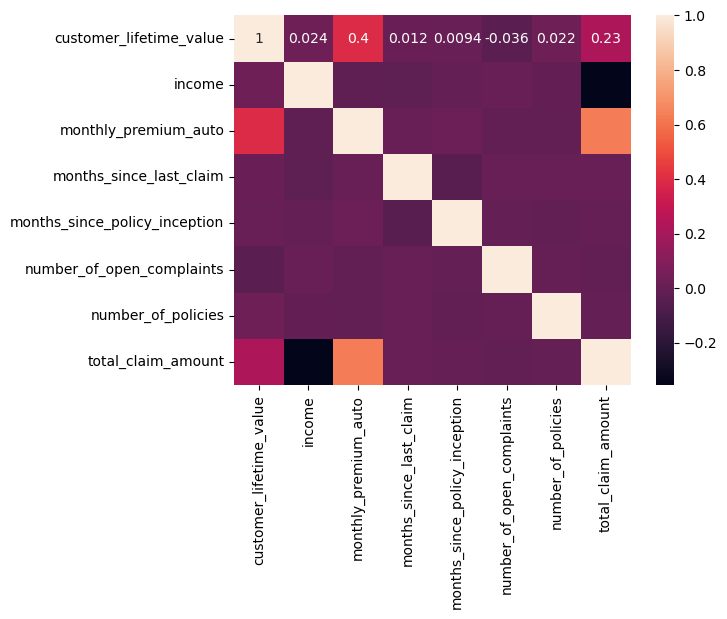

In [35]:
correlation_hmap(numerical)

In [36]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [37]:
categorical.policy_type.unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [38]:
categorical.policy.unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [39]:
categorical = categorical.drop(['policy_type', 'customer'], axis=1)

In [40]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [43]:
cat_onehot = categorical[['state','gender','location_code', 'marital_status', 'policy','sales_channel', 'vehicle_class']].copy()
cat_label = categorical[['response', 'coverage', 'education', 'employmentstatus', 'renew_offer_type', 'vehicle_size']].copy()

In [44]:
cat_onehot

,state,gender,location_code,marital_status,policy,sales_channel,vehicle_class
0,Washington,F,Suburban,Married,Corporate L3,Agent,Two-Door Car
1,Arizona,F,Suburban,Single,Personal L3,Agent,Four-Door Car
2,Nevada,F,Suburban,Married,Personal L3,Agent,Two-Door Car
3,California,M,Suburban,Married,Corporate L2,Call Center,SUV
4,Washington,M,Rural,Single,Personal L1,Agent,Four-Door Car
...,...,...,...,...,...,...,...
9129,California,M,Urban,Married,Personal L1,Web,Four-Door Car
9130,California,F,Suburban,Divorced,Corporate L3,Branch,Four-Door Car
9131,California,M,Suburban,Single,Corporate L2,Branch,Four-Door Car
9132,California,M,Suburban,Married,Personal L2,Branch,Four-Door Car


In [46]:
encoder = OneHotEncoder().fit(cat_onehot)
encoded = encoder.transform(cat_onehot).toarray()

encoder.categories_
cols = [colname for row in encoder.categories_ for colname in row]

table = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]

table = table.drop(cols_to_drop,axis=1)
table

,California,Nevada,Oregon,Washington,M,Suburban,Urban,Married,Single,Corporate L2,...,Special L2,Special L3,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
cat_label

,response,coverage,education,employmentstatus,renew_offer_type,vehicle_size
0,No,Basic,Bachelor,Employed,Offer1,Medsize
1,No,Extended,Bachelor,Unemployed,Offer3,Medsize
2,No,Premium,Bachelor,Employed,Offer1,Medsize
3,No,Basic,Bachelor,Unemployed,Offer1,Medsize
4,No,Basic,Bachelor,Employed,Offer1,Medsize
...,...,...,...,...,...,...
9129,No,Basic,Bachelor,Employed,Offer2,Medsize
9130,Yes,Extended,College,Employed,Offer1,Medsize
9131,No,Extended,Bachelor,Unemployed,Offer1,Medsize
9132,No,Extended,College,Employed,Offer3,Large


In [49]:
label_table = cat_label.copy()

label_table = label_table.apply(LabelEncoder().fit_transform)
label_table

,response,coverage,education,employmentstatus,renew_offer_type,vehicle_size
0,0,0,0,1,0,1
1,0,1,0,4,2,1
2,0,2,0,1,0,1
3,0,0,0,4,0,1
4,0,0,0,1,0,1
...,...,...,...,...,...,...
9129,0,0,0,1,1,1
9130,1,1,1,1,0,1
9131,0,1,0,4,0,1
9132,0,1,1,1,2,0


In [50]:
final_table = pd.concat([numerical, table, label_table], axis=1)
final_table

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,California,Nevada,...,Luxury SUV,SUV,Sports Car,Two-Door Car,response,coverage,education,employmentstatus,renew_offer_type,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,2,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,1.0,...,0.0,0.0,0.0,1.0,0,2,0,1,0,1
3,7645.861827,0,106,18,65,0,7,529.881344,1.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,4,0,1
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,1,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,1.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,1
9131,8163.890428,0,85,9,37,3,2,790.784983,1.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,0,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,1.0,0.0,...,0.0,0.0,0.0,0.0,0,1,1,1,2,0


In [52]:
transf = MinMaxScaler().fit(final_table)
normal_table = transf.transform(final_table)

normal_table = pd.DataFrame(normal_table, columns = final_table.columns)
normal_table.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly_premium_auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
total_claim_amount,9134.0,0.150006,0.100410,0.0,0.094071,0.132675,0.189212,1.0
California,9134.0,0.344865,0.475350,0.0,0.000000,0.000000,1.000000,1.0
Nevada,9134.0,0.096562,0.295377,0.0,0.000000,0.000000,0.000000,1.0


In [53]:
# Numerical
X = normal_table.drop(['total_claim_amount'], axis=1)
y = normal_table['total_claim_amount']
display(y)
X

0       0.132974
1       0.391051
2       0.195764
3       0.183117
4       0.047710
          ...   
9129    0.068485
9130    0.131034
9131    0.273297
9132    0.238876
9133    0.127716
Name: total_claim_amount, Length: 9134, dtype: float64

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Luxury SUV,SUV,Sports Car,Two-Door Car,response,coverage,education,employmentstatus,renew_offer_type,vehicle_size
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.25,0.000000,0.5
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.00,1.00,0.666667,0.5
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.00,0.25,0.000000,0.5
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.00,1.00,0.000000,0.5
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.333333,0.5
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.5,0.25,0.25,0.000000,0.5
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.00,1.00,0.000000,0.5
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.25,0.25,0.666667,0.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
predictions = lm.predict(X)
r2 = r2_score(y, predictions)
print('R2:', r2)
mse = np.sqrt(mean_squared_error(y,predictions))
print('MSE:', mse)
rmse = math.sqrt(mse)
print('RMSE:', rmse)
mae = mean_absolute_error(y, predictions)
print('MAE:', mae)

R2: 0.7696856008859851
MSE: 0.048185180918022576
RMSE: 0.2195112318721358
MAE: 0.033136733434271565
